### Example of sampling from a multivariate gaussian

In [1]:
%pylab inline
import numpy as np
from distribution import *
from proposal import *
from sampler import Sampler

Populating the interactive namespace from numpy and matplotlib


In [2]:
dim = 2
mu = np.zeros(dim)
cov = 0.01 * np.eye(dim)

t_dist = MultivariateGaussian(cov=cov, mu=mu, dim=dim)

In [3]:
proposal = PCNMove(s=5, beta=0.99)

In [4]:
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=100)

In [6]:
hist = sampler.run_mcmc(100000, p0=np.random.randn(dim*100).reshape([100, dim]))

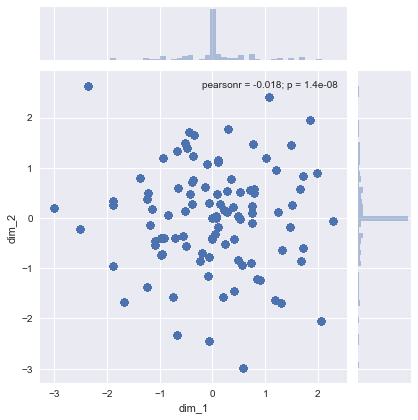

In [8]:
hist.plot_scatter(dim=[[0, 1]])

In [9]:
hist.acceptance_rate

0.34743000000000002